Potrzebne biblioteki do zadania.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
import time
from pprint import pprint

Funkcja, która generuje określoną liczbę losowych punktów w dwuwymiarowej przestrzeni.


*   "*point_count*" - licza punktów do wygenerowania.
*   "*np.random.rand()*" - z biblioteki NumPy do generowania losowych punktów w zakresie od 0 do 1.



In [ ]:
def create_random_points(point_count):
    np.random.seed(0)

    return np.random.rand(point_count, 2)

Funkcja wykonuje triangulację Delaunay na zestawie punktów.


*   "*points*" - tablica zawierająca współrzędne punktów do triangulacji.
*   "*Delaunay()*" - z biblioteki SciPy do przeprowadzenia triangulacji.

Zwraca obiekt triangulacji i czas wykonania.



In [ ]:
def perform_triangulation(points):
    start_time = time.time()
    tri = Delaunay(points)
    exec_time = time.time() - start_time

    return tri, exec_time

 Funkcja wykonująca prostą triangulację poprzez połączenie kolejnych punktów.


*   "*points*" - tablica zawierająca współrzędne punktów do triangulacji.

Triangulacja polega na połączeniu każdego punktu z dwoma następnymi punktami w sekwencji.

Zwraca listę trójkątów i czas wykonania triangulacji.




In [ ]:
def simple_triangulation(points):
    start_time = time.time()
    triangles = []

    for i in range(len(points) - 2):
      #Dla każdego indeksu i, tworzony jest trójkąt, łącząc aktualny punkt i z następnym punktem i + 1
      #oraz punktem dwa kroki dalej (i + 2) % len(points).
        triangles.append([i, i + 1, (i + 2) % len(points)])
    exec_time = time.time() - start_time

    return triangles, exec_time

Funkcja służąca do analizy statystyki trójkątów (mediana, średnia, moda i histogram obszarów trójkątów).


*   "*triangles*" - lista trójkątów.
*   "*points*" - tablica zawierająca współrzędne punktów.

Obliczane są tu obszary trójkątów i zbierane statystyki na ich temat.

Zwracany jest słownik zawierający statystyki, tablicę obszarów trójkątów i liczbę trójkątów.



In [ ]:
def analyze_triangles(triangles, points):
    areas = []

    for tri in triangles:
        pt1, pt2, pt3 = points[tri[0]], points[tri[1]], points[tri[2]]
        #Obliczenie obszaru trójkąta
        area = 0.5 * abs(pt1[0] * pt2[1] + pt2[0] * pt3[1] + pt3[0] * pt1[1] - pt1[1] * pt2[0] - pt2[1] * pt3[0] - pt3[1] * pt1[0])
        areas.append(area)

    areas = np.array(areas)
    stats = {
        "median": np.median(areas),
        "mean": np.mean(areas),
        "mode": np.bincount(areas.astype(int)).argmax(),
        "histogram": np.histogram(areas, bins=5)
    }

    return stats, areas, len(triangles)

Funckja do rysowania histogramu obszarów trójkątów.


*   "*areas*" - tablica obszarów trójkątów.



In [ ]:
def draw_histogram(areas):
    plt.figure()
    plt.hist(areas, bins=5, color='pink', alpha=0.8)
    plt.title("Histogram of Triangle Areas")
    plt.xlabel("Area")
    plt.ylabel("Number of Triangles")
    plt.show()

Funcka służąca do rysowania wykresu wyników triangulacji.

In [ ]:
def draw_triangles(points, triangles, title="Triangulation"):
    plt.figure()
    plt.triplot(points[:, 0], points[:, 1], triangles, color='pink')
    plt.plot(points[:, 0], points[:, 1], 'o', color='lightblue')
    plt.title(title)
    plt.show()

Program główny

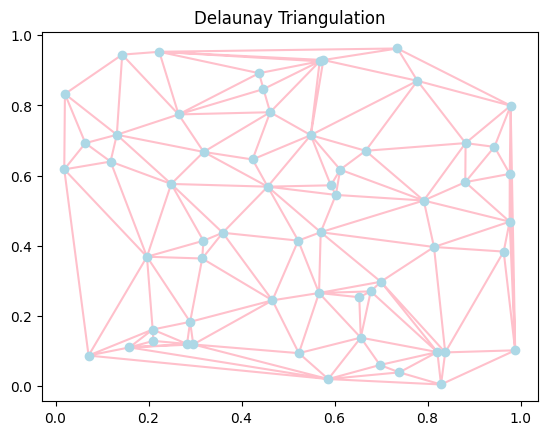

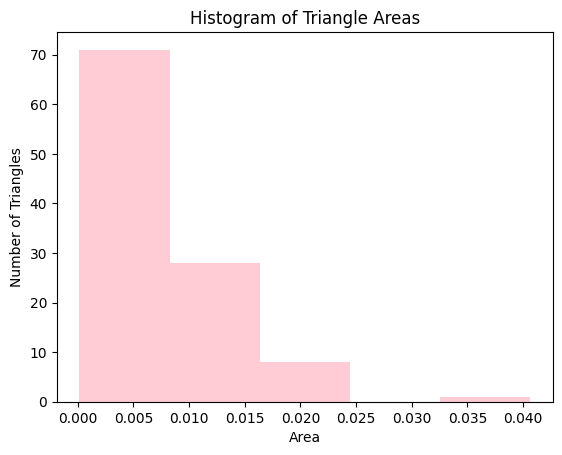

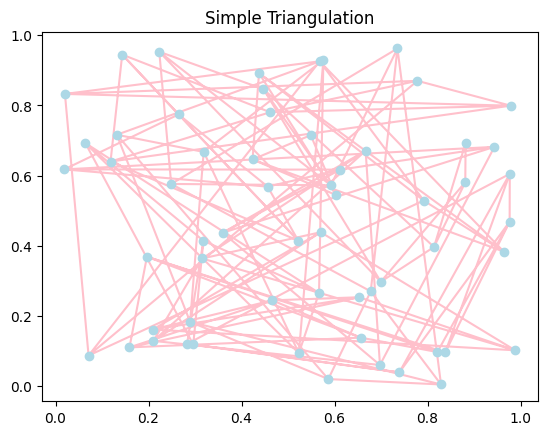

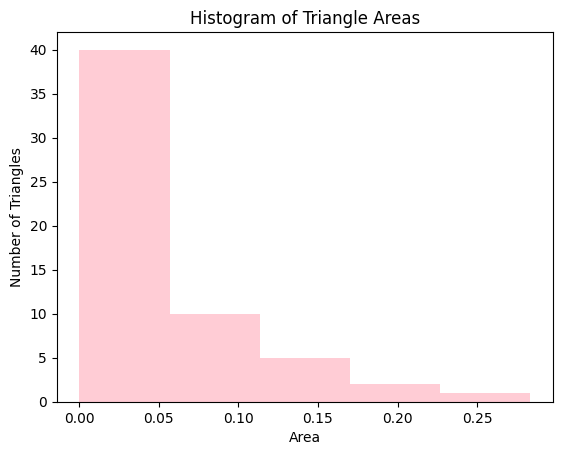

Delaunay triangulation time: 0.007974 seconds, number of triangles: 108, stats:

{'histogram': (array([71, 28,  8,  0,  1]),
               array([0.00015642, 0.00825668, 0.01635694, 0.0244572 , 0.03255745,
       0.04065771])),
 'mean': 0.007755904452432544,
 'median': 0.006689925348459472,
 'mode': 0}

Simple triangulation time: 0.000039 seconds, number of triangles: 58, stats:

{'histogram': (array([40, 10,  5,  2,  1]),
               array([1.35404802e-04, 5.68019305e-02, 1.13468456e-01, 1.70134982e-01,
       2.26801507e-01, 2.83468033e-01])),
 'mean': 0.05114669264982435,
 'median': 0.030675290240392603,
 'mode': 0}


In [ ]:
def main():
    point_count = 60
    random_points = create_random_points(point_count)

    # Delaunay Triangulation
    triangulation, delaunay_time = perform_triangulation(random_points)
    triangulation_stats, triangulation_areas, triangulation_count = analyze_triangles(triangulation.simplices, random_points)
    draw_triangles(random_points, triangulation.simplices, "Delaunay Triangulation")
    draw_histogram(triangulation_areas)

    # Simple Triangulation
    simple_triangles, simple_time = simple_triangulation(random_points)
    simple_stats, simple_areas, simple_count = analyze_triangles(simple_triangles, random_points)
    draw_triangles(random_points, simple_triangles, "Simple Triangulation")
    draw_histogram(simple_areas)

    # Porównanie wyników triangulacji Delaunay i prostej triangulacji
    print(f"Delaunay triangulation time: {delaunay_time:.6f} seconds, number of triangles: {triangulation_count}, stats:\n")
    pprint(triangulation_stats)
    print(f"\nSimple triangulation time: {simple_time:.6f} seconds, number of triangles: {simple_count}, stats:\n")
    pprint(simple_stats)

if __name__ == "__main__":
    main()